# How do eigenvalues change with migration rates and population sizes?

In [21]:
from dismal.generator_matrices import GeneratorMatrix
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import linalg
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

### Scenario 1: equal population sizes, change in (equal) migration rates

In [3]:
mig_rates = [i/10 for i in range(0, 101, 1)]
eigvals = []
eigvects = []
for mig_rate in mig_rates:
    q1 = GeneratorMatrix(matrix_type="Q1", theta1=1, theta1_prime=1, theta2_prime=1, m1_prime_star=mig_rate, m2_prime_star=mig_rate)
    _, v = q1.eigen()
    eigvals.append(v)

scen1_df = pd.DataFrame({"mig_rate": mig_rates, "eig1":np.array(eigvals)[:,0], "eig2":np.array(eigvals)[:,1], "eig3":np.array(eigvals)[:,2]})
scen1_df = scen1_df.melt(id_vars="mig_rate")
scen1_df

,mig_rate,variable,value
0,0.0,eig1,-1.000000
1,0.1,eig1,-1.109902
2,0.2,eig1,-1.238516
3,0.3,eig1,-1.383095
4,0.4,eig1,-1.540312
...,...,...,...
298,9.6,eig3,-0.486988
299,9.7,eig3,-0.487122
300,9.8,eig3,-0.487253
301,9.9,eig3,-0.487382


<Axes: xlabel='mig_rate', ylabel='value'>

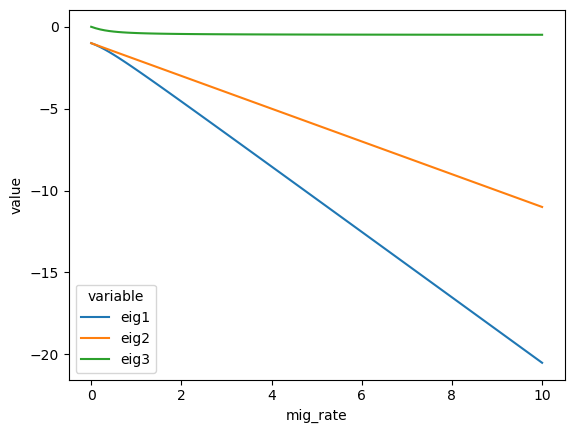

In [4]:
sns.lineplot(scen1_df, x="mig_rate", y="value", hue="variable")

### Scenario 2: different population sizes, no migration

In [5]:
theta1 = 1
pop_sizes = [i/10 for i in range(1, 101, 1)]

eigvals = []
eigvects = []
for pop_size in pop_sizes:
    q1 = GeneratorMatrix(matrix_type="Q1", theta1=1, theta1_prime=pop_size, theta2_prime=pop_size, m1_prime_star=0, m2_prime_star=0)
    _, v = q1.eigen()
    eigvals.append(v)
eigvals
scen2_df = pd.DataFrame({"pop_size": pop_sizes, "eig1":np.array(eigvals)[:,0], "eig2":np.array(eigvals)[:,1], "eig3":np.array(eigvals)[:,2]})
scen2_df = scen2_df.melt(id_vars="pop_size")
scen2_df

,pop_size,variable,value
0,0.1,eig1,-10.000000
1,0.2,eig1,-5.000000
2,0.3,eig1,-3.333333
3,0.4,eig1,-2.500000
4,0.5,eig1,-2.000000
...,...,...,...
295,9.6,eig3,0.000000
296,9.7,eig3,0.000000
297,9.8,eig3,0.000000
298,9.9,eig3,0.000000


<Axes: xlabel='pop_size', ylabel='value'>

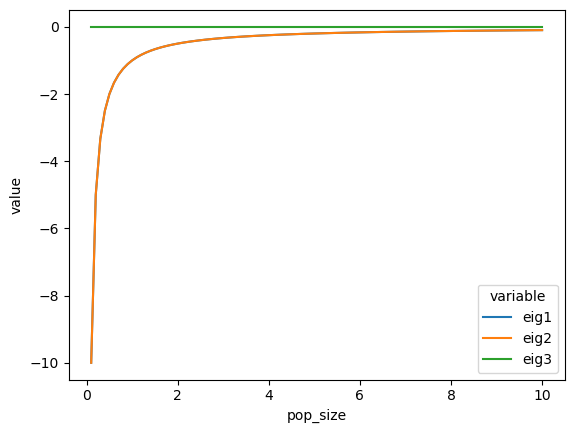

In [6]:
sns.lineplot(scen2_df, x="pop_size", y="value", hue="variable")

If M=0, eigval1 = eigval2

### Scenario 3: variation in both migration rate and population size

In [7]:
pop_sizes = [i/10 for i in range(1, 101, 1)]
mig_rates = [i/10 for i in range(0, 100, 1)]
param_set = [i for i in itertools.product(pop_sizes, mig_rates)]

eigvals = []
for params in param_set:
    q1 = GeneratorMatrix(matrix_type="Q1", theta1=1, theta1_prime=params[0], theta2_prime=params[0], m1_prime_star=params[1], m2_prime_star=params[1])
    _, v = q1.eigen()
    eigvals.append(v)

scen3_df = pd.DataFrame({"pop_size": np.array(param_set)[:,0], "mig_rate":np.array(param_set)[:,1], "eig1":np.array(eigvals)[:,0], "eig2":np.array(eigvals)[:,1], "eig3":np.array(eigvals)[:,2]})
scen3_df = scen3_df.melt(id_vars=["pop_size", "mig_rate"])
scen3_df

,pop_size,mig_rate,variable,value
0,0.1,0.0,eig1,-10.000000
1,0.1,0.1,eig1,-11.099020
2,0.1,0.2,eig1,-12.385165
3,0.1,0.3,eig1,-13.830952
4,0.1,0.4,eig1,-15.403124
...,...,...,...,...
29995,10.0,9.5,eig3,-0.048685
29996,10.0,9.6,eig3,-0.048699
29997,10.0,9.7,eig3,-0.048712
29998,10.0,9.8,eig3,-0.048725


In [24]:
eig1_df = scen3_df[scen3_df["variable"] == "eig1"][0:10]

In [26]:
eig1_df

,pop_size,mig_rate,variable,value
0,0.1,0.0,eig1,-10.000000
1,0.1,0.1,eig1,-11.099020
2,0.1,0.2,eig1,-12.385165
3,0.1,0.3,eig1,-13.830952
4,0.1,0.4,eig1,-15.403124
5,0.1,0.5,eig1,-17.071068
6,0.1,0.6,eig1,-18.810250
7,0.1,0.7,eig1,-20.602325
8,0.1,0.8,eig1,-22.433981
9,0.1,0.9,eig1,-24.295630


In [27]:
i = 1
j = 1
eig1_df["value"][(eig1_df["pop_size"]==eig1_df["pop_size"][i]) & (eig1_df["mig_rate"]==eig1_df["mig_rate"][j])]

1   -11.09902
Name: value, dtype: float64

In [33]:
l = len(eig1_df)
params = [i for i in itertools.product(range(0, l), range(0,l))]

In [67]:
l = [i for i in range(0, len(eig1_df))]
params = [i for i in itertools.product(l, repeat=2)]

z_mat = np.zeros(shape=(len(eig1_df),len(eig1_df)))

for param in params:
    print(param)
    i = param[0]
    j = param[1]
    z_val = eig1_df["value"][(eig1_df["pop_size"]==eig1_df["pop_size"][i]) & (eig1_df["mig_rate"]==eig1_df["mig_rate"][j])]
    z_mat[i][j] = z_val

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)


/var/folders/qk/10crn8pd5_d038f0tw_7z2800000gp/T/ipykernel_88067/3108611401.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  z_mat[i][j] = z_val


In [68]:
z_mat

array([[-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-1

In [ ]:
def coutour_plot(df, x, y, z):
    x = df[x]
    y = df[y]
    z = df[z]

    

In [29]:
z_mat

array([[-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-10.        , -11.09901951, -12.38516481, -13.83095189,
        -15.40312424, -17.07106781, -18.81024968, -20.60232527,
        -22.43398113, -24.29563014],
       [-1